# Calculate the Compressive strength of Concrete based on certain attributes


#### Description and Project Overview:

This project is based on a dataset obtained from the Kaggle. The dataset consists of 1030 observations and 9 attributes of which 8 are quantitative inputs and 1 is quantitative output.
This project aims to predict concrete compressive strength based on essential predictors such as cement, water, aggregates (coarse and fine), age, fly ash, and additives on Concrete compressive strength. In this project, I have used Random Forest (Machine Learning modelling technique) for the prediction. In this project, I have used Random Forest (Machine Learning modelling technique) for the prediction.

The datasets consists of several predictor variables and one target variable, Outcome. 
- Predictor variables includes:
    - Cement content
    - Blast Furnance content
    - Fly Ash content
    - Water content
    - Super Plasticizer content
    - Coarse Aggregates content
    - Fine Aggregates content
    - Age (Testing period)
    
- Considering above predictors (attributes), we will be calculating the compressive strength of Concrete

#### The stages which are involves in this project are:
    1. Data Preprocessing
    2. Data Analysis
    3. Data Visualization
    4. Hypothesis and Modelling
    5. Evaluation and Interpretation
    6. Saving and Loading the Model
    7. Deployment of it through Streamlit Cloud with a simple web application


# Import Necessary Libraries

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import pickle as pkl

In [55]:
df = pd.read_csv("Concrete Compressive Strength.csv")

# Data Pre-Processing

In [56]:
df.columns = ['cement','blastFurnace','flyAsh','water','superplasticizer','courseAggregate','fineaggregate','age','strength']

In [57]:
df.head()

,cement,blastFurnace,flyAsh,water,superplasticizer,courseAggregate,fineaggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [58]:
df.dtypes

cement              float64
blastFurnace        float64
flyAsh              float64
water               float64
superplasticizer    float64
courseAggregate     float64
fineaggregate       float64
age                   int64
strength            float64
dtype: object

In [59]:
df.shape

(1030, 9)

In [60]:
df.duplicated().sum()

25

#####
Here we can see that total 25 duplicate samples are present in dataset which has no use, so will drop the same from dataset

In [61]:
df.drop_duplicates(inplace=True)

In [62]:
df.isnull().sum()

cement              0
blastFurnace        0
flyAsh              0
water               0
superplasticizer    0
courseAggregate     0
fineaggregate       0
age                 0
strength            0
dtype: int64

#####
We can see that there's no any Null value present in dataset

# Data Analysis

In [63]:
df.describe()

,cement,blastFurnace,flyAsh,water,superplasticizer,courseAggregate,fineaggregate,age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.629055,72.043134,55.535075,182.074378,6.031647,974.376468,772.686617,45.856716,35.250273
std,104.345003,86.170555,64.207448,21.340740,5.919559,77.579534,80.339851,63.734692,16.284808
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.680000,0.000000,0.000000,166.610000,0.000000,932.000000,724.300000,7.000000,23.523542
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.798114
75%,349.000000,142.500000,118.270000,192.940000,10.000000,1031.000000,822.200000,56.000000,44.868340
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


# Data Visualization

<Axes: >

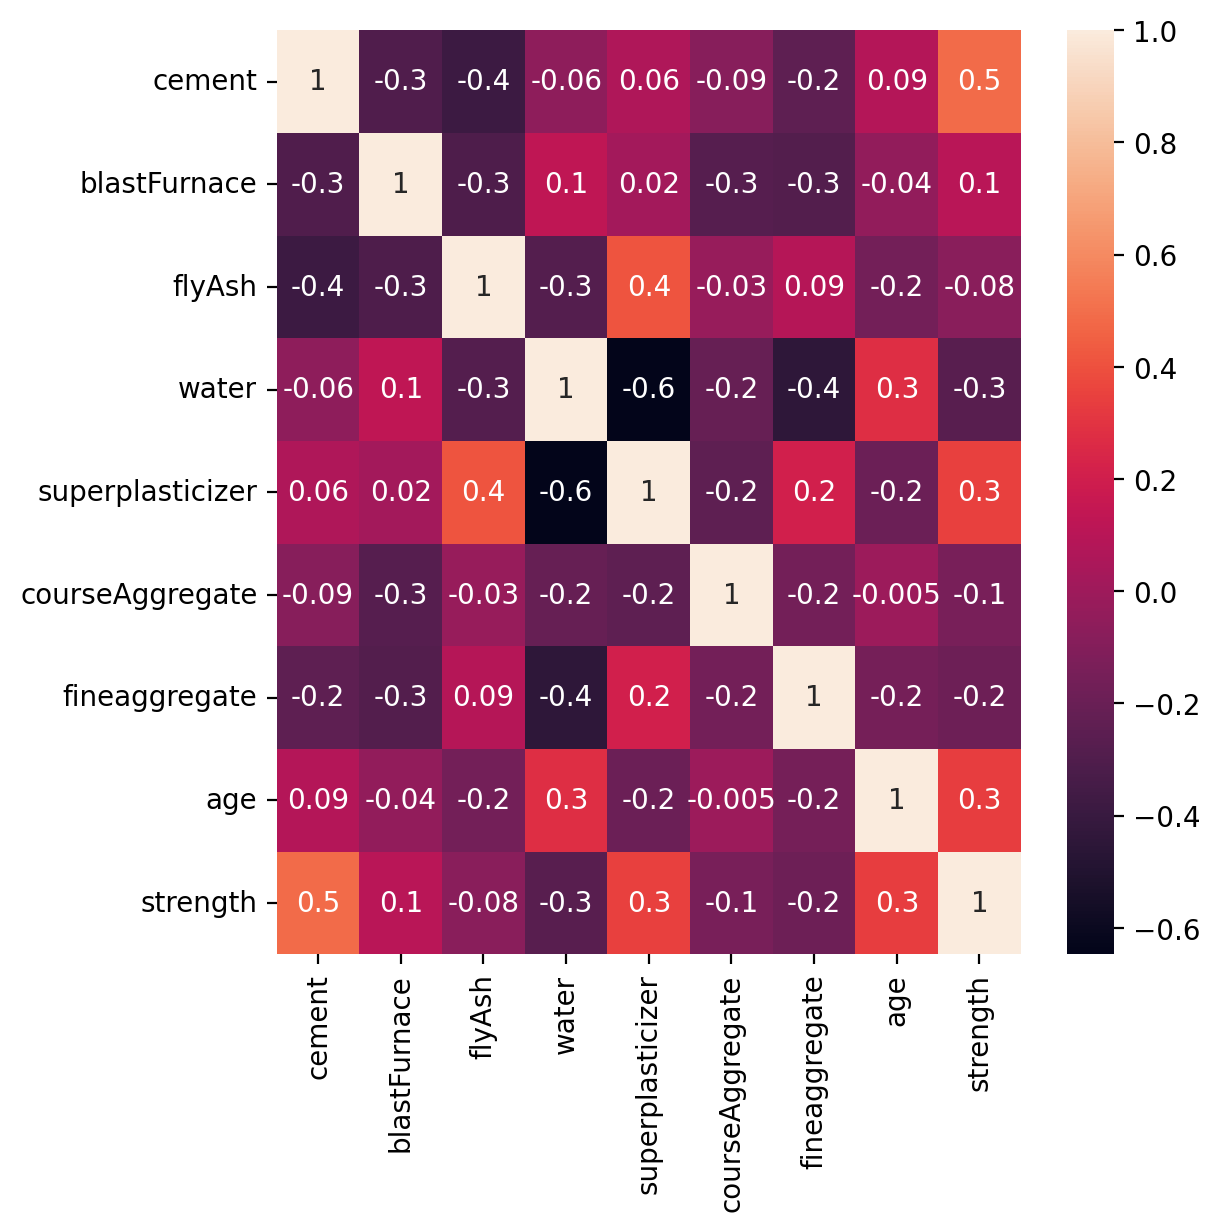

In [64]:
plt.figure(figsize=(6,6), dpi=200)
sns.heatmap(df.corr(), annot=True, fmt=".1g")

##### 
In above heatmap we can see that, blast furnace and fly ash are in inverse correlation with cement content. So as we increase the cement content there will be decrease in fly ash and blast furnace content.

Water is inversely correlated with strength, as we increase the water content there will be decrease in strength

Cement is positively correlated with strength, as if we increase the cement content there will be increase in strength

Text(0.5, 1.0, 'Strength')

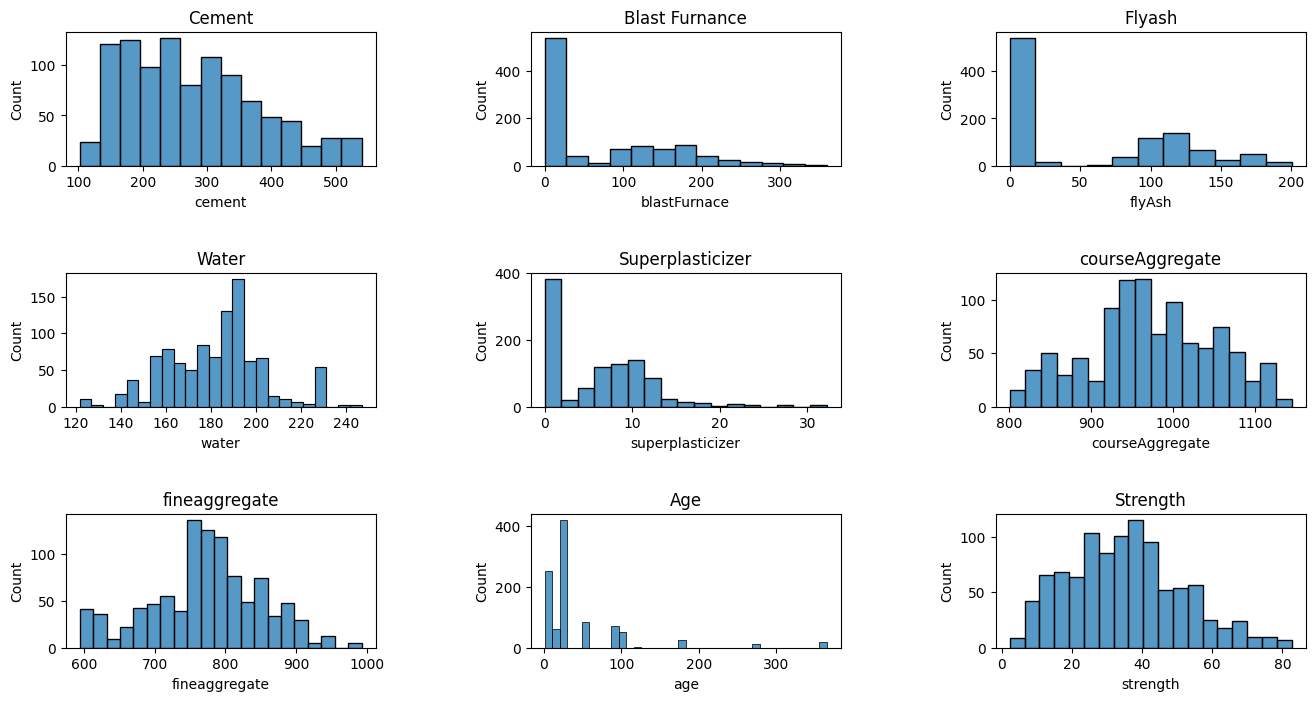

In [65]:
plt.figure(figsize=(16,8))
plt.subplots_adjust(wspace=0.5,
                    hspace=0.8)
plt.subplot(3,3,1)
sns.histplot(df.cement)
plt.title("Cement")

plt.subplot(3,3,2)
sns.histplot(df.blastFurnace)
plt.title("Blast Furnance")

plt.subplot(3,3,3)
sns.histplot(df.flyAsh)
plt.title("Flyash")

plt.subplot(3,3,4)
sns.histplot(df.water)
plt.title("Water")

plt.subplot(3,3,5)
sns.histplot(df.superplasticizer)
plt.title("Superplasticizer")

plt.subplot(3,3,6)
sns.histplot(df.courseAggregate)
plt.title("courseAggregate")

plt.subplot(3,3,7)
sns.histplot(df.fineaggregate)
plt.title("fineaggregate")

plt.subplot(3,3,8)
sns.histplot(df.age)
plt.title("Age")

plt.subplot(3,3,9)
sns.histplot(df.strength)
plt.title("Strength")

##### 
Above graphs show the no. of given samples (attributes) having respective contents in a dataset

<Axes: xlabel='strength'>

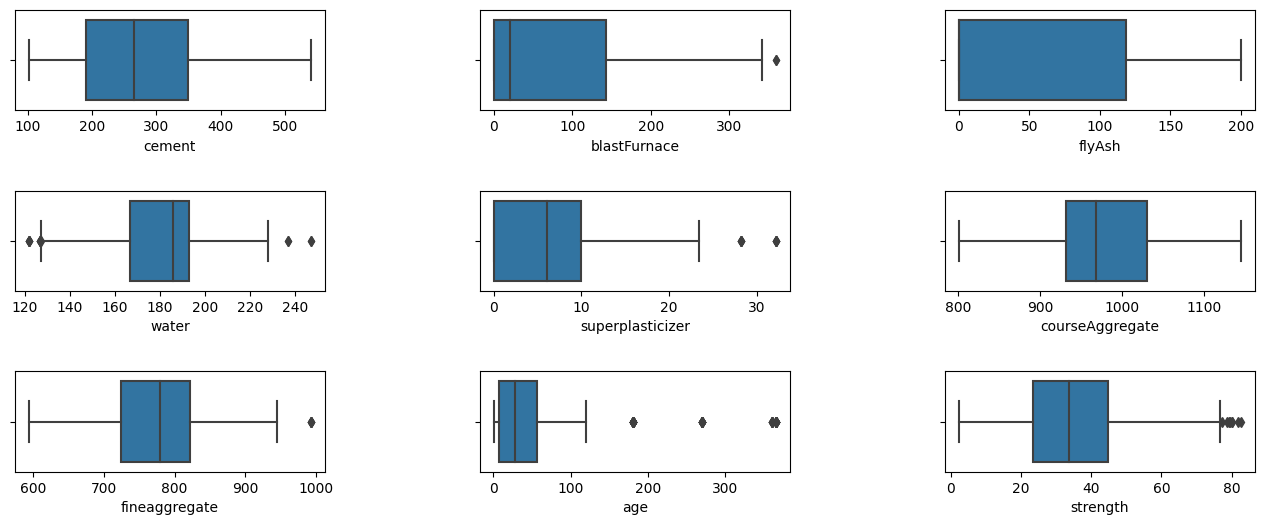

In [66]:
plt.figure(figsize=(16,6))
plt.subplots_adjust(wspace=0.5,
                    hspace=0.8)

plt.subplot(3,3,1)
sns.boxplot(x=df.cement)

plt.subplot(3,3,2)
sns.boxplot(x=df.blastFurnace)

plt.subplot(3,3,3)
sns.boxplot(x=df.flyAsh)

plt.subplot(3,3,4)
sns.boxplot(x=df.water)

plt.subplot(3,3,5)
sns.boxplot(x=df.superplasticizer)

plt.subplot(3,3,6)
sns.boxplot(x=df.courseAggregate)

plt.subplot(3,3,7)
sns.boxplot(x=df.fineaggregate)

plt.subplot(3,3,8)
sns.boxplot(x=df.age)

plt.subplot(3,3,9)
sns.boxplot(x=df.strength)

##### 
In above boxplot we can see the Interquartile range, maximum & minimum values and median values of each attribute

Text(0.5, 1.0, 'Water content Vs Strength')

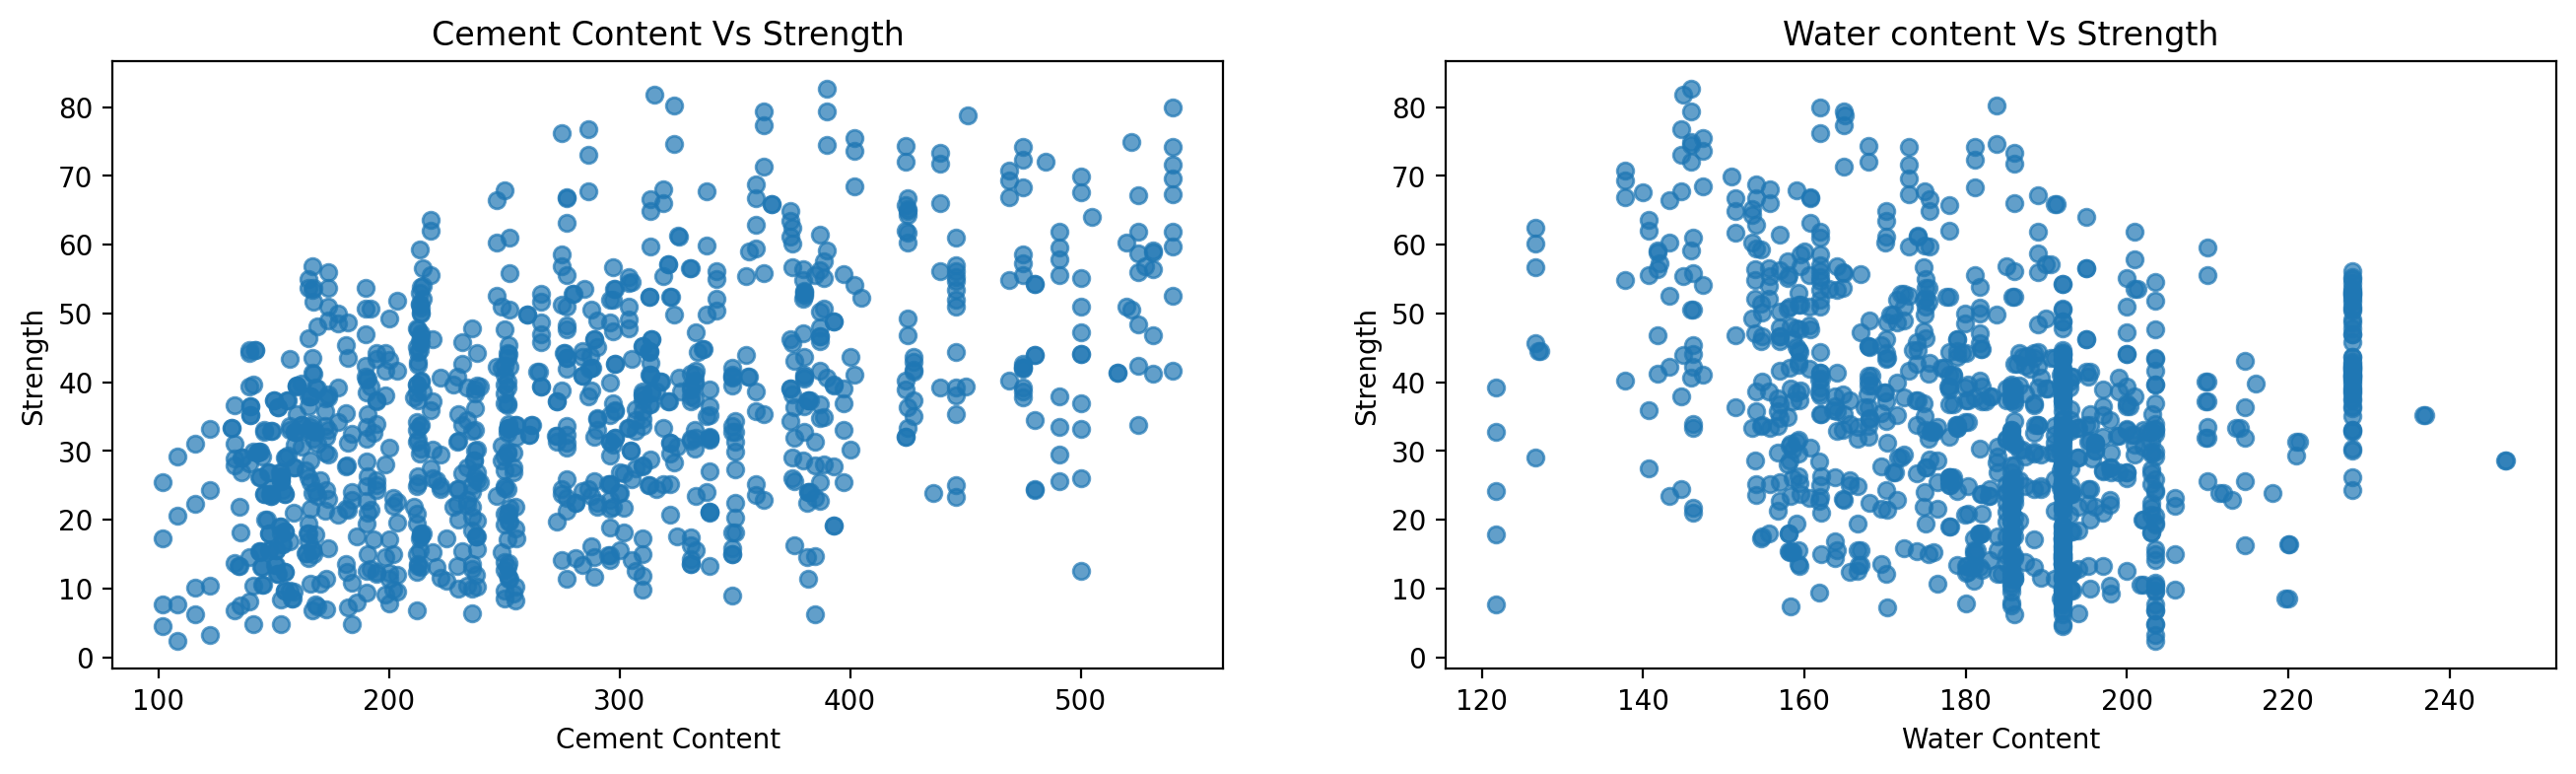

In [67]:
plt.figure(figsize=(16,4), dpi=200)
plt.subplots_adjust(wspace=0.2, hspace=0.8)

plt.subplot(1,2,1)
plt.scatter(x=df.cement, y=df.strength, alpha=0.7)
plt.xlabel("Cement Content")
plt.ylabel("Strength")
plt.title("Cement Content Vs Strength")

plt.subplot(1,2,2)
plt.scatter(x=df.water, y=df.strength, alpha=0.7)
plt.xlabel("Water Content")
plt.ylabel("Strength")
plt.title("Water content Vs Strength")


##### 
An increase in Cement Content caused to increase in compressive strength. In the opposite to it, an increase in water content causes to decrease in strength

In [68]:
# splitting the data into X and y and further into training and testing
X = df.drop("strength", axis=1)
y = df["strength"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating Model

In [69]:
model = RandomForestRegressor(n_estimators=150, max_depth=35, random_state=23)

In [70]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=35, n_estimators=150, random_state=23)

# Evaluation and Interpretation

In [71]:
pred = model.predict(X_test)

In [72]:
r2_score(pred, y_test)

0.8877920598188306

# Saving the Model

In [73]:
# saving the trained model with pickle lib

filename = "trained_model.sav"
pkl.dump(model, open(filename, "wb"))

# Loading the Model

In [74]:
# Loading the saved model with pickle lib

loaded_model = pkl.load(open("trained_model.sav", "rb"))

# Passing the new inputs for prediction

In [77]:
# Taking input data
input_data = (317.9, 0.0, 126.5, 209.7, 5.7, 860.5, 736.6, 28)

# changing the input data into array
input_data_in_array = np.asarray(input_data)

# reshaping the data as we are predicting for one instance
reshaped_input_data = input_data_in_array.reshape(1,-1)

prediction = model.predict(reshaped_input_data)
print(prediction, "MPa")

[35.6561732] MPa


C:\Users\Manoj Gaikwad\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
